In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [14]:
# Load dataset
df = pd.read_csv("/content/Amazon.csv")

In [15]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [16]:
# Use Adjusted Close as the time series, enforce business-day frequency
X = df["Adj Close"].asfreq("B")


# Log transform (stabilize variance)
X_log = np.log(X)


# First difference to achieve stationarity
X_log_diff = X_log.diff().dropna()

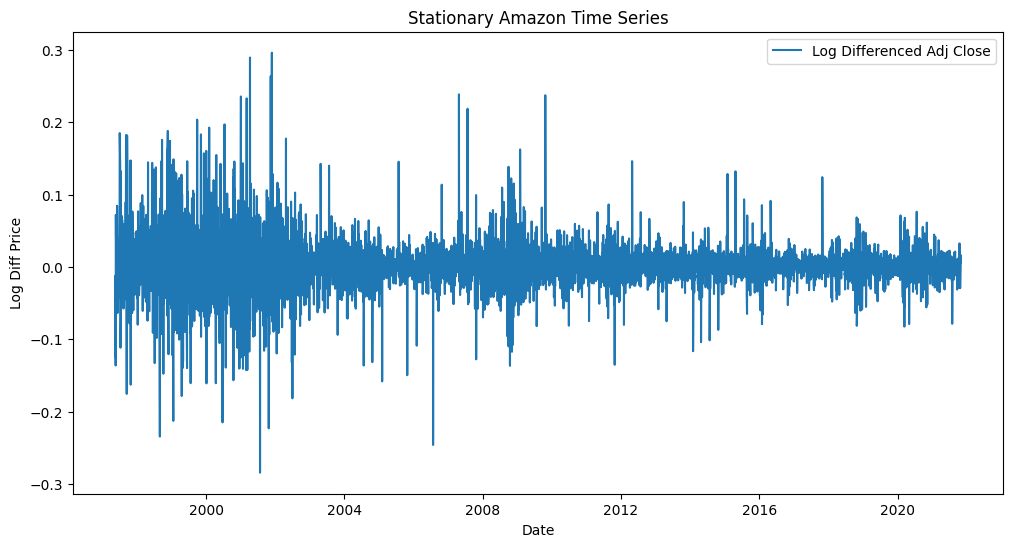

In [17]:
# Plot stationary series
plt.figure(figsize=(12,6))
plt.plot(X_log_diff, label="Log Differenced Adj Close")
plt.title("Stationary Amazon Time Series")
plt.xlabel("Date")
plt.ylabel("Log Diff Price")
plt.legend()
plt.show()

In [18]:
# Check stationarity (ADF Test)
result = adfuller(X_log_diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -13.473003226360996
p-value: 3.353853655772596e-25


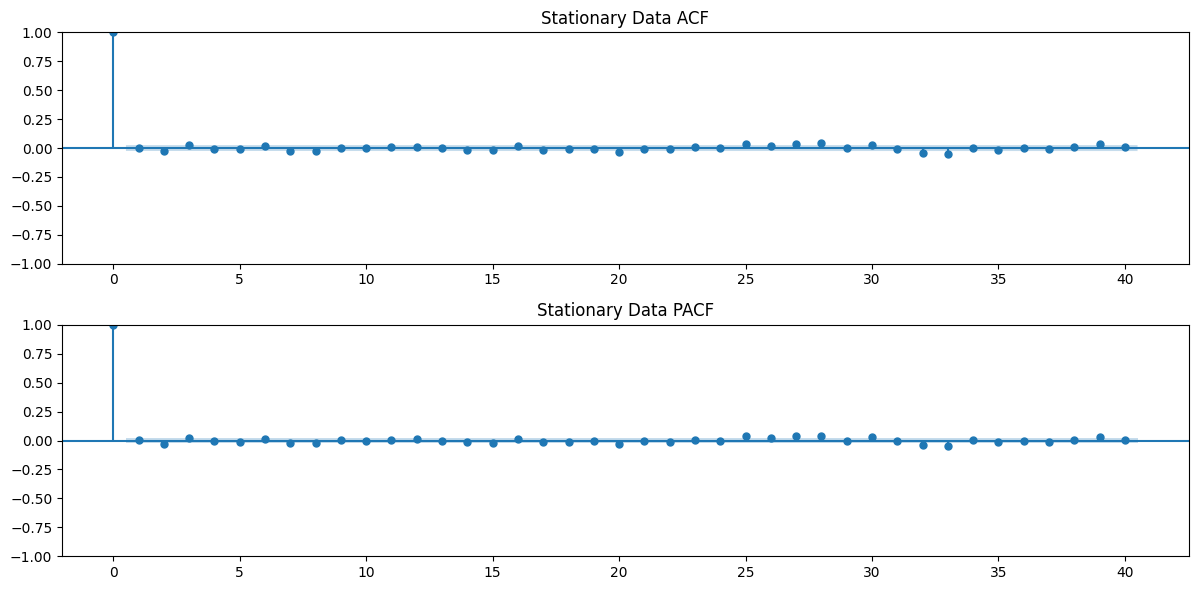

In [19]:
# Plot ACF and PACF
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plot_acf(X_log_diff, lags=40, ax=plt.gca())
plt.title("Stationary Data ACF")
plt.subplot(2,1,2)
plot_pacf(X_log_diff, lags=40, ax=plt.gca())
plt.title("Stationary Data PACF")
plt.tight_layout()
plt.show()

In [20]:
# Fit ARMA(1,1) Model
arma11_model = ARIMA(X_log_diff, order=(1, 0, 1)).fit()
print("ARMA(1,1) Summary:\n", arma11_model.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(1,1) Summary:
                                SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 5934
Model:                 ARIMA(1, 0, 1)   Log Likelihood               11344.055
Date:                Mon, 22 Sep 2025   AIC                         -22680.110
Time:                        17:36:13   BIC                         -22653.356
Sample:                             0   HQIC                        -22670.814
                               - 5934                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      2.106      0.035    6.86e-05       0.002
ar.L1         -0.8949      0.250     -3.586      0.000      -1.384      -0.406
ma.L1          0.8979      0.247

In [21]:
# Simulate ARMA(1,1) process
phi1 = arma11_model.params.get('ar.L1', 0)
theta1 = arma11_model.params.get('ma.L1', 0)
ar1 = np.array([1, -phi1])
ma1 = np.array([1, theta1])
arma11_sim = ArmaProcess(ar1, ma1).generate_sample(nsample=200)

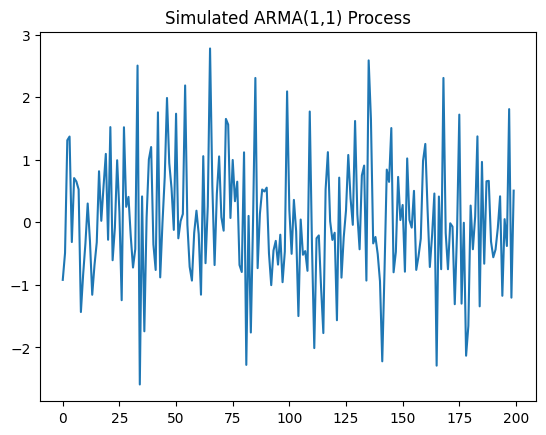

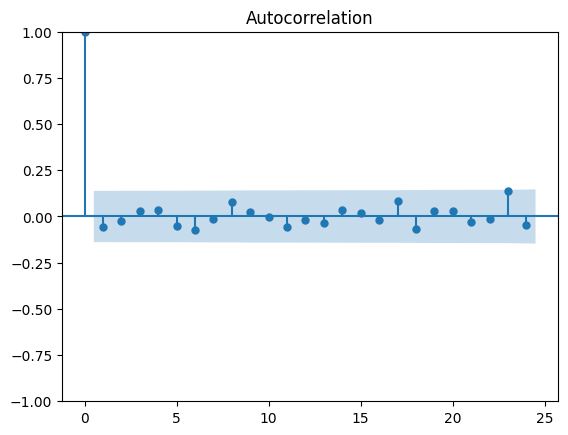

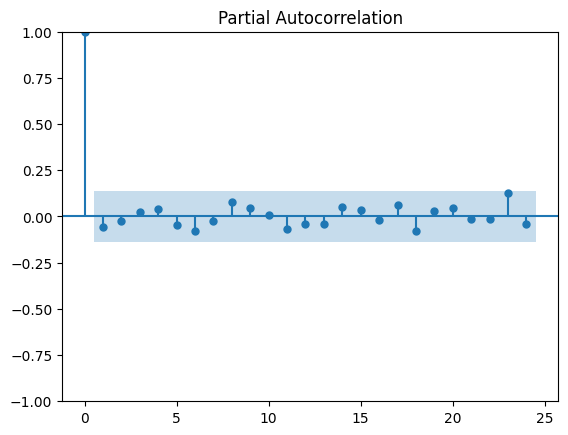

In [22]:
plt.plot(arma11_sim)
plt.title("Simulated ARMA(1,1) Process")
plt.show()
plot_acf(arma11_sim)
plt.show()
plot_pacf(arma11_sim)
plt.show()

In [23]:
# Fit ARMA(2,2) Model
arma22_model = ARIMA(X_log_diff, order=(2, 0, 2)).fit()
print("ARMA(2,2) Summary:\n", arma22_model.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARMA(2,2) Summary:
                                SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 5934
Model:                 ARIMA(2, 0, 2)   Log Likelihood               11349.325
Date:                Mon, 22 Sep 2025   AIC                         -22686.650
Time:                        17:37:13   BIC                         -22646.520
Sample:                             0   HQIC                        -22672.706
                               - 5934                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      2.135      0.033    8.11e-05       0.002
ar.L1         -0.8459      0.184     -4.604      0.000      -1.206      -0.486
ar.L2         -0.5444      0.155

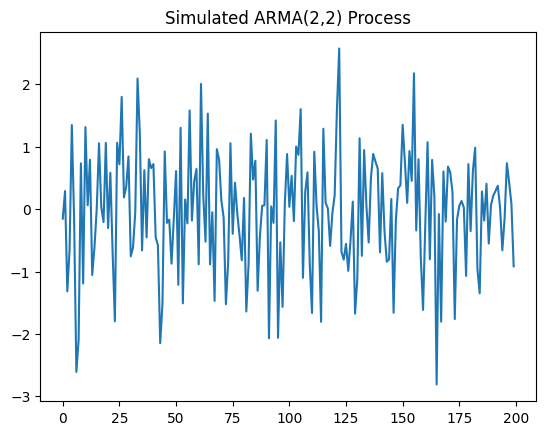

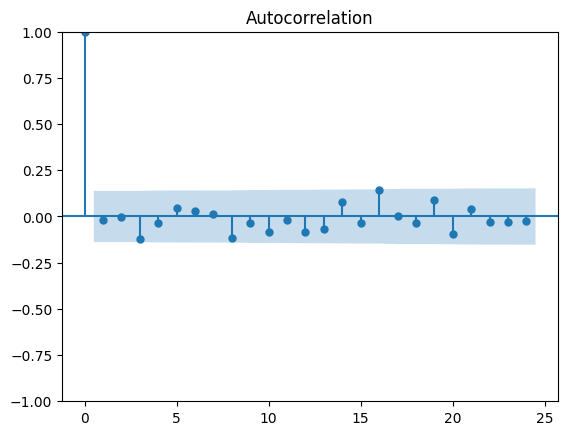

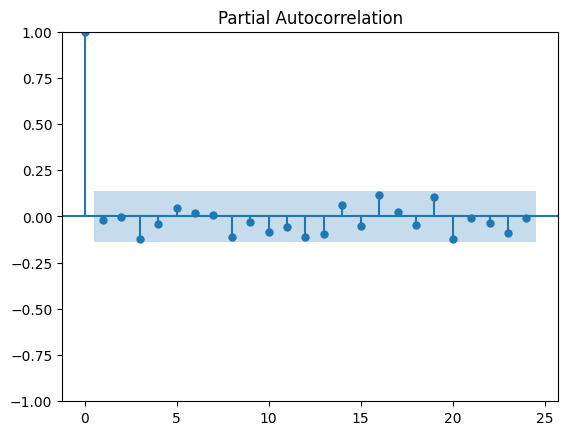

In [25]:
plt.plot(arma22_sim)
plt.title("Simulated ARMA(2,2) Process")
plt.show()
plot_acf(arma22_sim)
plt.show()
plot_pacf(arma22_sim)
plt.show()